In [7]:
#numpy and pandas used for data manipulation
import numpy as np
import pandas as pd
#matplotlib used for visualization
from matplotlib import pyplot as plt
#os used to get file directories
import os
#opencv used to make get images into numbered arrays
import cv2
import random
from time import time

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

First, grab all the file directories for images which are size 1

In [8]:
def get_filedir(list):
    allnames = []
    count = 0
    tempname = 'an2i'
    for (dirpath, dirnames, filenames) in os.walk("faces/"):
        allnames.extend(filenames)
    for name in allnames[1:]:
        if (name.split('_')[-1] not in ['2.pgm', '4.pgm']) and (name[-3:] =='pgm'):
            if name.split('_')[0] != tempname:
                count = count + 1
                tempname = name.split('_')[0]
                filedir.append([])
            filedir[count].append('faces/' + name.split('_')[0] + '/' + name)

In [9]:
filedir = [[]]
get_filedir(filedir)

the first 2 people in the file:

In [10]:
filedir[:2]

[['faces/an2i/an2i_left_angry_open.pgm',
  'faces/an2i/an2i_left_angry_sunglasses.pgm',
  'faces/an2i/an2i_left_happy_open.pgm',
  'faces/an2i/an2i_left_happy_sunglasses.pgm',
  'faces/an2i/an2i_left_neutral_open.pgm',
  'faces/an2i/an2i_left_neutral_sunglasses.pgm',
  'faces/an2i/an2i_left_sad_open.pgm',
  'faces/an2i/an2i_left_sad_sunglasses.pgm',
  'faces/an2i/an2i_right_angry_open.pgm',
  'faces/an2i/an2i_right_angry_sunglasses.pgm',
  'faces/an2i/an2i_right_happy_open.pgm',
  'faces/an2i/an2i_right_happy_sunglasses.pgm',
  'faces/an2i/an2i_right_neutral_open.pgm',
  'faces/an2i/an2i_right_neutral_sunglasses.pgm',
  'faces/an2i/an2i_right_sad_open.pgm',
  'faces/an2i/an2i_right_sad_sunglasses.pgm',
  'faces/an2i/an2i_straight_angry_open.pgm',
  'faces/an2i/an2i_straight_angry_sunglasses.pgm',
  'faces/an2i/an2i_straight_happy_open.pgm',
  'faces/an2i/an2i_straight_happy_sunglasses.pgm',
  'faces/an2i/an2i_straight_neutral_open.pgm',
  'faces/an2i/an2i_straight_neutral_sunglasses.pg

an example of an image:

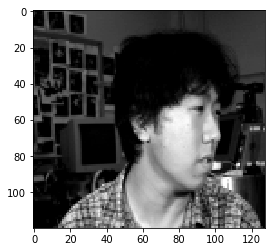

In [11]:
img1 = cv2.imread(filedir[0][0],0)
plt.imshow(img1, plt.cm.gray)
plt.show()

split the set into a training set and a testing set, with pics organized per person, and and 30% in test set

In [12]:
def get_person_name(name_list, filedir):
    for person in filedir:
        for img in person:
            name_list.append(img.split('/')[1])

In [13]:
name = []
get_person_name(name, filedir)

In [14]:
def get_img_matrix(img_list, filedir):
    for person in filedir:
        for img in person:
            img_list.append(cv2.imread(img, 0).ravel())

In [15]:
full_img_list = []
get_img_matrix(full_img_list, filedir)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(full_img_list, name, test_size=0.7, random_state=1)

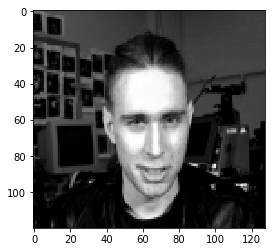

In [17]:
image1 = np.array(X_test[0]).reshape(img1.shape)
plt.imshow(image1, plt.cm.gray)
plt.show()

In [18]:
pca1 = PCA(n_components=50)
pca1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca1.components_
#list of principle components

array([[-0.0035502 , -0.0031646 , -0.0019384 , ..., -0.00143976,
        -0.00159618, -0.00113351],
       [ 0.0028543 ,  0.0033835 ,  0.00324959, ..., -0.0008289 ,
        -0.00142748, -0.00119199],
       [-0.003538  , -0.00251144, -0.00055698, ..., -0.0065025 ,
        -0.00604194, -0.00532927],
       ..., 
       [ 0.00254181, -0.00102331, -0.00265826, ...,  0.00512266,
         0.00654591,  0.0051772 ],
       [-0.0014844 , -0.00206651, -0.00462503, ..., -0.00030455,
         0.00366608,  0.00759364],
       [-0.00353299, -0.00034448, -0.00080671, ..., -0.00306815,
         0.00153534,  0.00134919]])

In [20]:
img1.shape

(120, 128)

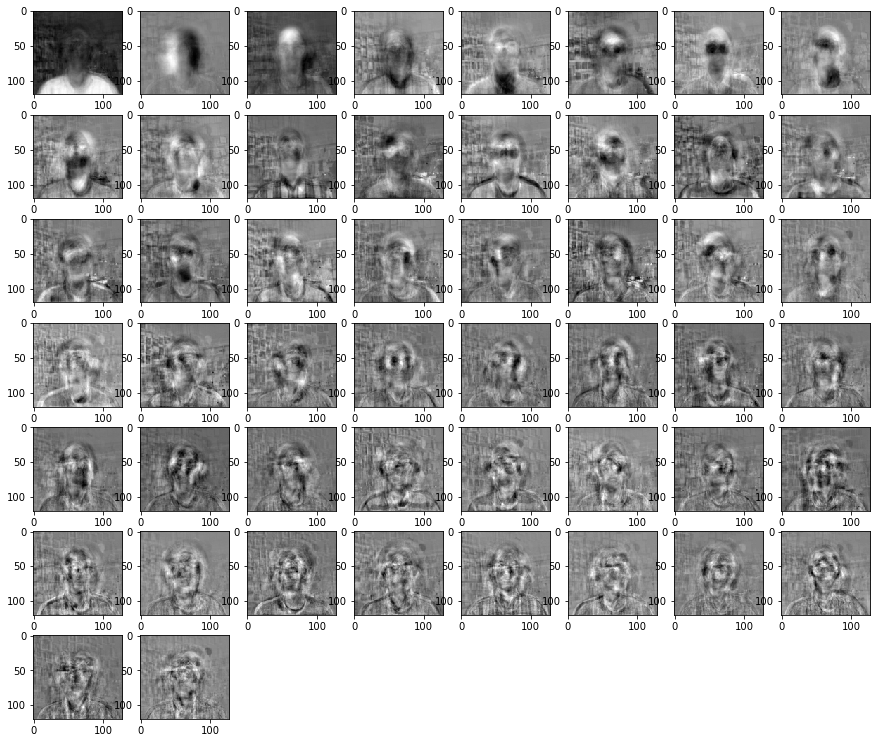

In [21]:
eigenfaces = pca1.components_.reshape((50, 120, 128))
i = 1
plt.figure(figsize=(15, 15))
for row in eigenfaces:
    plt.subplot(8,8,i)
    plt.imshow(row, plt.cm.gray)
    i = i + 1
plt.show()

In [22]:
x_train_pca = pca1.transform(X_train)
x_test_pca = pca1.transform(X_test)

In [23]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 1.831s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))#, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.035s
             precision    recall  f1-score   support

       an2i       0.00      0.00      0.00        23
       at33       0.00      0.00      0.00        23
     boland       0.00      0.00      0.00        24
        bpm       0.00      0.00      0.00        26
       ch4f       0.00      0.00      0.00        20
     cheyer       0.00      0.00      0.00        23
      choon       0.00      0.00      0.00        20
    danieln       0.00      0.00      0.00        24
   glickman       0.00      0.00      0.00        20
    karyadi       0.00      0.00      0.00        22
   kawamura       0.00      0.00      0.00        18
       kk49       0.00      0.00      0.00        26
      megak       0.00      0.00      0.00        20
   mitchell       0.00      0.00      0.00        20
      night       0.00      0.00      0.00        21
     phoebe       0.00      0.00      0.00        20
     saavik       0.00      0.00      0.0

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


some code copied from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#sphx-glr-auto-examples-applications-face-recognition-py

In [39]:
clf.score(x_test_pca, y_test)

0.041189931350114416